In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [25]:
# 使用dropout
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu"))
# model.add(keras.layers.AlphaDropout(rate=0.5))
# AlphaDropout相对于普通Dropout优势: 1. 均值和方差不变 2. 归一化性质也不变
model.add(keras.layers.Dropout(rate=0.5))  # Dropout直接将神经元乘以0
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [26]:
logdir = './dnn-selu-dropout-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9065 - accuracy: 0.6956 - val_loss: 0.5278 - val_accuracy: 0.8160
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5799 - accuracy: 0.8029 - val_loss: 0.4694 - val_accuracy: 0.8350
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5108 - accuracy: 0.8259 - val_loss: 0.4346 - val_accuracy: 0.8470
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4631 - accuracy: 0.8390 - val_loss: 0.4184 - val_accuracy: 0.8566
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4334 - accuracy: 0.8484 - val_loss: 0.4408 - val_accuracy: 0.8348
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4114 - accuracy: 0.8548 - val_loss: 0.4038 - val_accuracy: 0.8564
Epoch 7/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3929 - accuracy: 0.8609 - val_loss: 0.4314 - val_ac

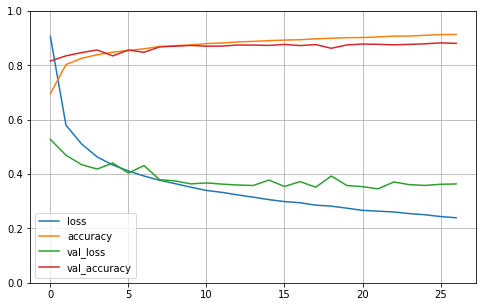

In [27]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [28]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.39229515194892883, 0.8712000250816345]